Caso 1

Caracterización de los datos

In [7]:
import csv
import statistics

ages = []
bmis = []
charges = []

with open('insurance.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        ages.append(int(row['age']))
        bmis.append(float(row['bmi']))
        charges.append(float(row['charges']))


age_mean = statistics.mean(ages)
age_median = statistics.median(ages)
age_stddev = statistics.stdev(ages)
bmi_mean = statistics.mean(bmis)
bmi_median = statistics.median(bmis)
bmi_stddev = statistics.stdev(bmis)
charges_mean = statistics.mean(charges)
charges_median = statistics.median(charges)
charges_stddev = statistics.stdev(charges)


print("Estadísticas descriptivas para 'age':")
print(f"   Media: {age_mean}")
print(f"   Mediana: {age_median}")
print(f"   Desviación estándar: {age_stddev}")

print("\nEstadísticas descriptivas para 'bmi':")
print(f"   Media: {bmi_mean}")
print(f"   Mediana: {bmi_median}")
print(f"   Desviación estándar: {bmi_stddev}")

print("\nEstadísticas descriptivas para 'charges':")
print(f"   Media: {charges_mean}")
print(f"   Mediana: {charges_median}")
print(f"   Desviación estándar: {charges_stddev}")


Estadísticas descriptivas para 'age':
   Media: 39.20702541106129
   Mediana: 39.0
   Desviación estándar: 14.049960379216156

Estadísticas descriptivas para 'bmi':
   Media: 30.66339686098655
   Mediana: 30.4
   Desviación estándar: 6.098186911679014

Estadísticas descriptivas para 'charges':
   Media: 13270.422265141257
   Mediana: 9382.033
   Desviación estándar: 12110.011236694001


In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib.pyplot

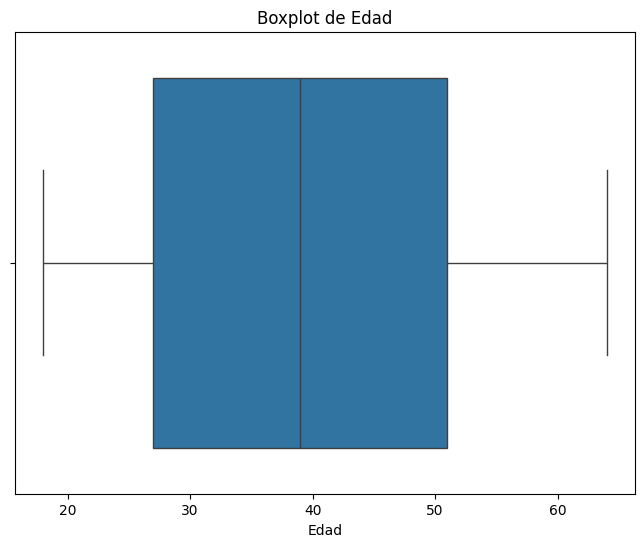

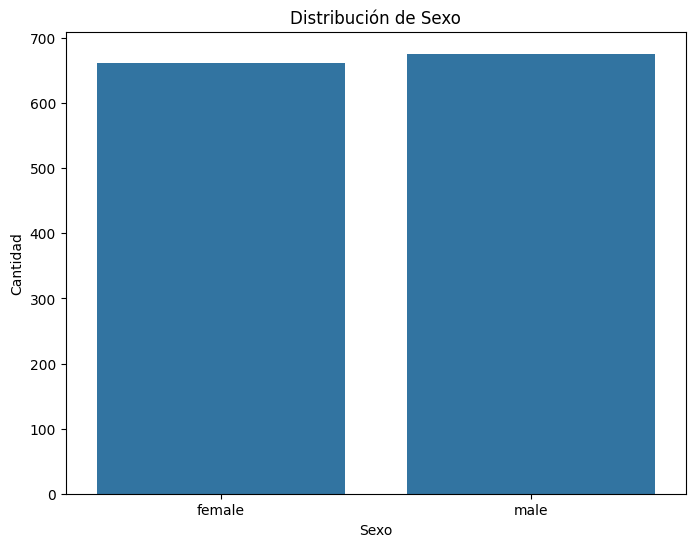

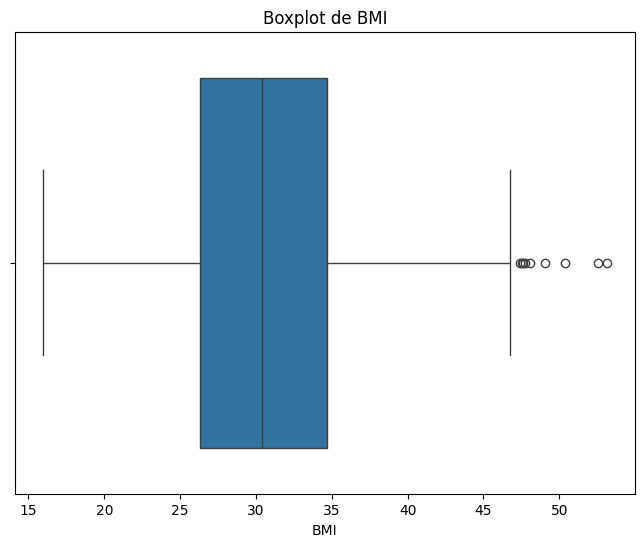

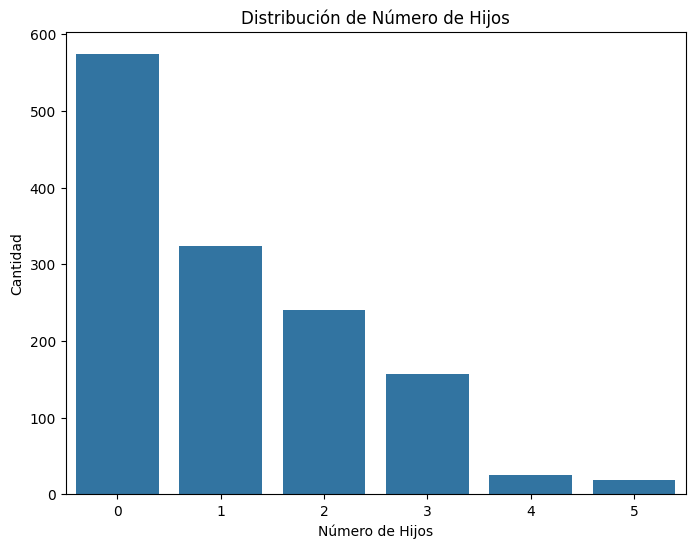

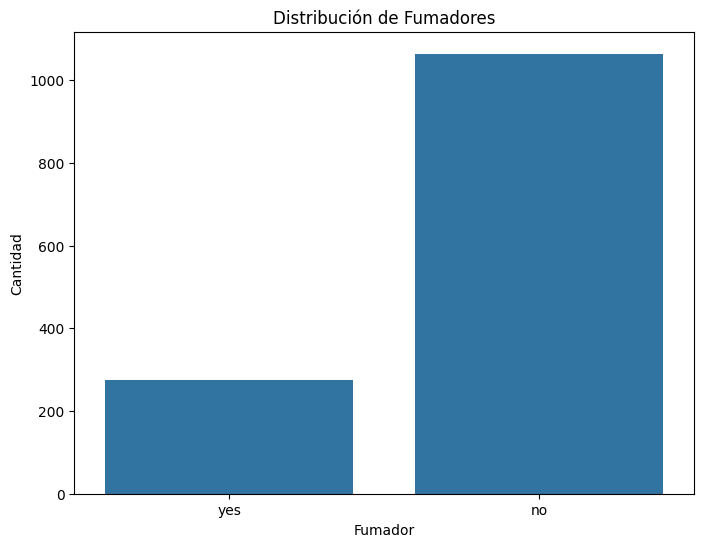

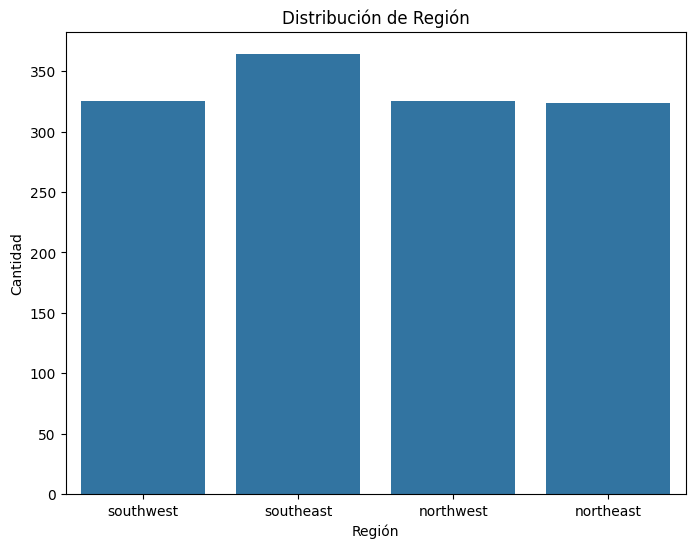

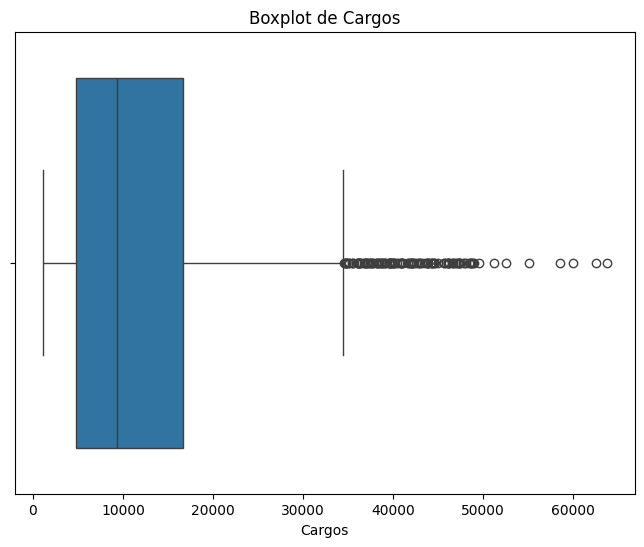

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')

plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

# Gráfico de barras para sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

# Box plot para BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi', data=df)
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.show()

# Gráfico de barras para número de hijos
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=df)
plt.title('Distribución de Número de Hijos')
plt.xlabel('Número de Hijos')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para fumadores
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=df)
plt.title('Distribución de Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para región
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=df)
plt.title('Distribución de Región')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.show()

# Box plot para cargos 
plt.figure(figsize=(8, 6))
sns.boxplot(x='charges', data=df)
plt.title('Boxplot de Cargos')
plt.xlabel('Cargos')
plt.show()


In [ ]:
pip install statistics

Modelo de Regresión

In [ ]:
pip install statsmodels

In [11]:
import pandas as pd

df = pd.read_csv('insurance.csv')

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()
print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [5]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('insurance.csv')

df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

X = df[['age', 'bmi', 'children', 'smoker']]  # Variables independientes
y = df['charges']  # Variable dependiente

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:30:14   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

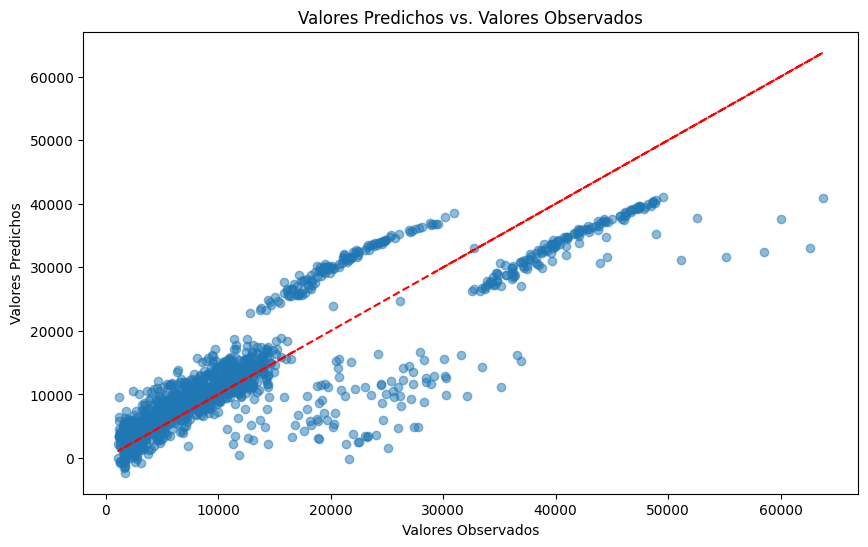

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')

df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

X = df[['age', 'bmi', 'children', 'smoker']]  # Variables independientes
y = df['charges']  # Variable dependiente

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

y_pred = modelo.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')  # Línea de identidad
plt.title('Valores Predichos vs. Valores Observados')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.show()


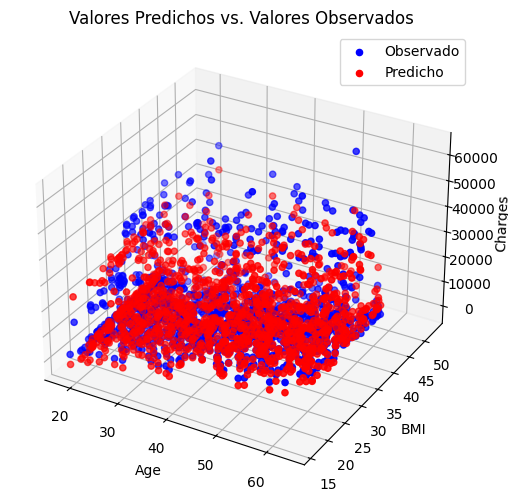

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['bmi'], y, color='blue', label='Observado')
ax.scatter(df['age'], df['bmi'], y_pred, color='red', label='Predicho')

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title('Valores Predichos vs. Valores Observados')

ax.legend()

plt.show()
